# Data Analysis: College Data
### K-Means Clustering analysis of data from various universities throughout the U.S.
##### Nathan Dorsey, Nate Willis  
     
In the ever-increasing competitiveness of the modern higher education landscape, gaining a better understanding of the incredibly diverse and multifaceted characteristics that distinguish institutions is crucial for prospective students, institutions themselves, and policymakers. 

Colleges and universities vary vastly in terms of academic rigor, culture, size, financial structuring, demographic, and faculty makeup. This variation presents a challenge, but also an opportunity, to better understand these differences and manage policy and strategy in terms of educational offerings, outcomes, and other factors that affect the well-being of students and the success of institutions. 

This dataset contains 777 different universities with a wide range of cost, prestige, academic rigor, size, culture, and other factors. This complexity of characteristics can make it difficult to identify trends or groupings between universities. Using a k-means clustering algorithm, however, we are able to identify key groupings of institutions which could allow individuals to make better informed decisions regarding a given institution

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
# import seaborn as sns
# sns.set(style='darkgrid')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in data
df = pd.read_csv('College_Data.csv')

In [3]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
# Rename columns
df.columns = ['university', 'private', 'apps', 'accepted', 'enrollment_peryear', 'top10perc', 'top25perc', 
              'ft_undergrad', 'pt_undergrad','outstate', 'room_board', 'books', 'personal', 'phd', 'terminal',
              's_f_ratio', 'alum_perc_donate', 'expend', 'grad_rate']

This dataset comes from Kaggle and contains numerical and categorical data on 777 universities across the nation. Using K-Means Clustering, we will group these into different clusters based on multiple factors and draw similarities between the universities within each cluster.

A brief summary of the columns:  

* `university`: Name of institution  
* `private` : Categorical data indicating whether the institution is private  
* `apps`: Number of applications received  
* `accepted`: Number of applications accepted  
* `enrollment_peryear`: Number of new students enrolled  
* `top10perc`: Pct. of new students from top 10% of H.S. class  
* `top25perc`: Pct. new students from top 25% of H.S. class  
* `ft_undergrad`: Number of fulltime undergraduates  
* `pt_undergrad`: Number of parttime undergraduates  
* `outstate`: Out-of-state tuition 
* `room_board`: Room and board costs  
* `books`: Estimated book costs  
* `personal`: Estimated personal spending  
* `phd`: Pct. of faculty with Ph.D.’s  
* `terminal`: Pct. of faculty with terminal degree  
* `s_f_ratio`: Student/faculty ratio  
* `alum_perc_donate`: Pct. of alumni who donate  
* `expend`: Instructional expenditure per student  
* `grad_rate`: Graduation rate  

In [5]:
missing_vals = df.isnull().sum
missing_vals()

university            0
private               0
apps                  0
accepted              0
enrollment_peryear    0
top10perc             0
top25perc             0
ft_undergrad          0
pt_undergrad          0
outstate              0
room_board            0
books                 0
personal              0
phd                   0
terminal              0
s_f_ratio             0
alum_perc_donate      0
expend                0
grad_rate             0
dtype: int64

No additional cleaning needs to be done, as the dataset has no missing values.

In [6]:
# Convert `private` to numerical data
df['private'] = df['private'].map({'Yes': 1, 'No': 0})

First, we'll normalize the data to make our analysis more accurate. 

In [7]:
numerical_cols = df.columns[2:]

In [8]:
df[numerical_cols]

,apps,accepted,enrollment_peryear,top10perc,top25perc,ft_undergrad,pt_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,alum_perc_donate,expend,grad_rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [9]:
# Normalize the data using a StandardScaler
scaler = StandardScaler()
numerical_cols = df.columns[2:]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Now, we need to determine the proper value of k; that is, how many clusters our data should be grouped into. We'll use the elbow method for this, plotting WCSS, or within cluster sum of squares. It will show us the sum of the variance at each value of k. 

In [10]:
# Build the elbow model
wcss = []
for i in range (1,9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[numerical_cols])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

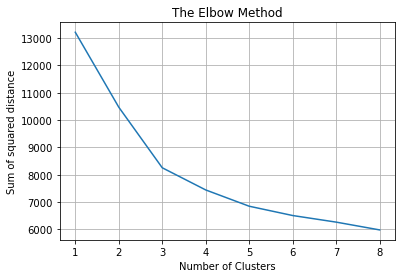

In [11]:
# Graph the elbow
num_clusters = range(1, 9)
plt.plot(num_clusters, wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of squared distance")
plt.grid(True)
plt.show()

From the graph, it appears that a k-value of `k=3` or `k=4` is best suited to carry out the analysis. For the sake of avoiding overfitting, and since it appears to be a sharper point of inflection, I'll choose `k=3`.

In [12]:
# Fitting the model
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_cols])

In [13]:
# df[numerical_cols]
numerical_cols

Index(['apps', 'accepted', 'enrollment_peryear', 'top10perc', 'top25perc',
       'ft_undergrad', 'pt_undergrad', 'outstate', 'room_board', 'books',
       'personal', 'phd', 'terminal', 's_f_ratio', 'alum_perc_donate',
       'expend', 'grad_rate'],
      dtype='object')

In [14]:
# Analyze the cluster centers (centroids) using inverse transform to de-standardize the data into their actual  values
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numerical_cols)
centroids = centroids.astype(int)

In [15]:
centroids

,apps,accepted,enrollment_peryear,top10perc,top25perc,ft_undergrad,pt_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,alum_perc_donate,expend,grad_rate
0,1565,1134,467,18,44,2188,660,8531,3955,532,1366,63,71,15,18,7363,59
1,10120,6939,2826,31,63,14692,3258,8280,4171,603,1890,83,89,16,15,9354,59
2,2866,1733,563,42,72,2235,293,14656,5144,559,1087,84,90,11,32,13864,78


Now that we have the data broken up into centroids, we can look at the center values for each cluster of schools to get an idea of the typical school in each of the three clusters. Let's go through them each and explain what each might mean. 

### Cluster 0 — Moderately-Sized, More Accessible, Less Prestegious Institutions
This cluster has a high acceptance rate and relatively high student-faculty ratio, especially for its relatively low enrollment. Schools in this cluster typically boast a moderate out-of-state tuition and lower room and board costs — and likely a low in-state tuition, although this is not explicitly in the dataset — and lowest total instructional expenditure. These universities also have the lowest academic rigor of the three clusters, which suggests, along with the other attributes, that they are geared towards individuals seeking a degree who may be in a financial or academic situation in which they are unable to attend a larger, more expensive, and/or more prestigious university. 

### Cluster 1 —  Large, Research-Oriented Institutions 
In this cluster, the number of applications, acceptances, and enrollment is significantly higher than either of the other centroids. They have a moderat cost compared to the other two clusters, especially compared to Cluster 2. This cluster also has a higher student-faculty ratio and a moderate graduation rate, and relatively strong academic reputation, but not quite as strong as Cluster 2. Instructors at these institutions are very likely to have a PhD or terminal degree in their field of expertise, which would be conducive to research and helpful for a university that had such a focus. 

### Cluster 2 — Small, Elite, Private Institutions 
Finally, this last cluster is perhaps the most interesting; with the lowest enrollment numbers, the highest academic reputation and the highest cost of attendance, we can conclude that this cluster contains smaller, higher-price, more elite universities, many of which are likely private institutions. These universities also have a significantly higher graduation rate than the other clusters, suggesting that the typical student of these institutions place academics in very high regard. There is also a high donation rate, typical of prestigious universities. 

In [16]:
cluster_summary = df.groupby('Cluster')['private'].agg(['count', 'sum'])
cluster_summary['Private Percentage'] = (cluster_summary['sum'] / cluster_summary['count']) * 100
cluster_summary['Public Percentage'] = 100 - cluster_summary['Private Percentage']
cluster_summary.rename(columns={'sum': 'Private Count', 'count': 'Total Universities'}, inplace=True)

In [17]:
cluster_summary

,Total Universities,Private Count,Private Percentage,Public Percentage
Cluster,,,,
0,438,316,72.146119,27.853881
1,93,11,11.827957,88.172043
2,246,238,96.747967,3.252033


Here, we can see that, indeed, Cluster 2 is overwhelmingly concentrated with private institutions, as we reasoned from the centroid data, Cluster 0 trailing moderately behind, and Cluster 1 with a very high concentration of public universities. This makes sense because the vast majority of large institutions are public, and schools that have less stringent acceptance rates and are likely willing to offer more case-by-case need to students — the more accessible universities — are more likely to be private institutions.

In [18]:
# Just for plotting
newDf = pd.DataFrame(scaler.inverse_transform(df[numerical_cols]), columns=numerical_cols)

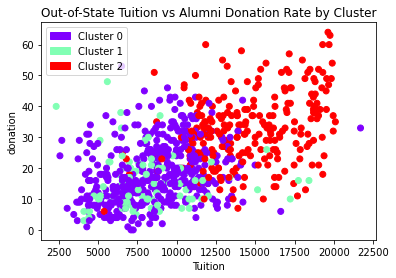

In [19]:
# Create a scatter plot of tuition against alumni donation rate
scatter = plt.scatter(newDf['outstate'], newDf['alum_perc_donate'],
           c=df['Cluster'], cmap='rainbow')
colors = [scatter.cmap(scatter.norm(i)) for i in range(int(df['Cluster'].max()) + 1)]
# Create a list of patches for the legend
patches = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in range(len(colors))]
# Add the legend to the plot
plt.legend(handles=patches)

plt.xlabel('Tuition')
plt.ylabel('donation')
plt.title('Out-of-State Tuition vs Alumni Donation Rate by Cluster')
plt.show()

The above scatterplot which plots out-of-state tuition against alumni donation rate shows a general positive correlation among the data, but more importantly, and more apparently, there is a pretty clear division between the 2nd and 0th cluster; that is, elite private institutions and widely accessible universities, respectively. This makes sense, as those attending these elite institutions are more likely to be in the financial position to donate to their university, while an individual attending a university with less prestige or elitism is more likely to have weaker ties with their university in the pseudo-political landscape of college. Cluster 1, due to it's smaller number of points and large number of attendees, is more sparse, which also should be expected due to the inherently diverse nature of the student bodies of larger institutions like those within Cluster 1. 

## Conclusion

The clusters provide valuable insight into the current landscape of higher education in the United States. The differences in attributes between the clusters suggests that different universities with different specializations and goals tend to fall into categories with one another and behave similarly. 

Further investigation into the universities in this dataset could provide deeper insight and understanding into the goals of particular institutions, which could help policymakers, university administrators, and prospective students alike evaluate their own needs and goals with various institutions or policies, creating actionable insight. Additionally, exploring more institutions in a similar method could aid the aforementioned groups in achieving a broader understanding of the above concerns. 

For example, prospective students, building off of the insights given from this analysis or a similar one, could be able to better asses the right choice of university for them given their own personal financial situation and professional goals. University heads and promoters can use this information to better advertise and cater their institution and its experience to its target demographic. Finally, policymakers can use insights like this to better give aid and subsidies to the institutions that need the help or that are targeted towards particular demographics. 